# 911 Calls Montgomery Count, PA (2015-2016)

Data Source: [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

**Objective: To do some explaratory analysis of the data, identify and visualize trends**

Anticipated weakness: Lack of context given that I am a Kenyan who doesn't fully understand the American 911 Emergency system

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [0]:
import pandas as pd

In [0]:
calls = pd.read_csv('911.csv')

In [0]:
#number of rows and columns in dataframe
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [0]:
#are there any null values
calls.isnull().sum().sum()

13417

In [0]:
#columns with null values ==> only two columns have null values - zip & addr
calls.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

Exploratory questions: Why do we only have null values in zip,township & address columns? Why are the zip null values significantly higher? Could this affect our analysis?

____
** Import numpy and pandas **

In [0]:
import numpy

** Import visualization libraries and set %matplotlib inline. **

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [0]:
df = pd.DataFrame(calls)

** Check the info() of the df **

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [0]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Exploratory Questions

** What are the top 5 zipcodes for 911 calls? **

In [0]:
#@title
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [0]:
#@title
#are there any null values in the zip column? Is this sufficient to distort our results were we to fill them up?
df['zip'].isnull().sum()

12855

** What are the top 5 townships (twp) for 911 calls? **

In [0]:
#@title
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** In the 'title' column, how many unique title codes are there? **

In [0]:
#@title
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We can use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [0]:
list(df['title'].unique())

['EMS: BACK PAINS/INJURY',
 'EMS: DIABETIC EMERGENCY',
 'Fire: GAS-ODOR/LEAK',
 'EMS: CARDIAC EMERGENCY',
 'EMS: DIZZINESS',
 'EMS: HEAD INJURY',
 'EMS: NAUSEA/VOMITING',
 'EMS: RESPIRATORY EMERGENCY',
 'EMS: SYNCOPAL EPISODE',
 'Traffic: VEHICLE ACCIDENT -',
 'EMS: VEHICLE ACCIDENT',
 'Traffic: DISABLED VEHICLE -',
 'Fire: APPLIANCE FIRE',
 'EMS: GENERAL WEAKNESS',
 'Fire: CARBON MONOXIDE DETECTOR',
 'EMS: UNKNOWN MEDICAL EMERGENCY',
 'EMS: UNRESPONSIVE SUBJECT',
 'Fire: VEHICLE ACCIDENT',
 'EMS: ALTERED MENTAL STATUS',
 'Fire: FIRE ALARM',
 'EMS: CVA/STROKE',
 'Traffic: ROAD OBSTRUCTION -',
 'EMS: SUBJECT IN PAIN',
 'EMS: HEMORRHAGING',
 'EMS: FALL VICTIM',
 'EMS: ASSAULT VICTIM',
 'EMS: SEIZURES',
 'EMS: MEDICAL ALERT ALARM',
 'EMS: ABDOMINAL PAINS',
 'Fire: PUMP DETAIL',
 'Fire: FIRE INVESTIGATION',
 'EMS: OVERDOSE',
 'EMS: MATERNITY',
 'EMS: UNCONSCIOUS SUBJECT',
 'EMS: CHOKING',
 'EMS: LACERATIONS',
 'Fire: TRASH/DUMPSTER FIRE',
 'Fire: UNKNOWN TYPE FIRE',
 'Fire: BUILDING FIRE',

In [0]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [0]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

** Given the new columns, what is the most common Reason for a 911 call? **

In [0]:
#EMS - Emergency Medical Services is the main reason people call 911
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Using a countplot let us look at 911 calls by Reason. **

In [0]:
sns.set_style('whitegrid')

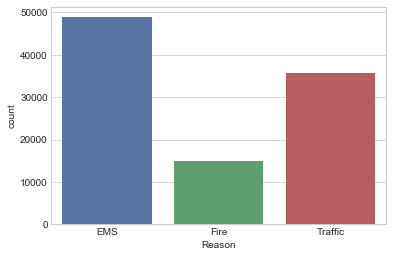

In [0]:
sns.countplot(df['Reason'],palette='deep')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [0]:
type(df['timeStamp'].iloc[0])

str

** Given that these these timestamps are still strings, we can use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [0]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [0]:
#how many unique timeStamps were recorded?
df['timeStamp'].nunique()

72577

In [0]:
#the timeStamp column data is now transformed to a time series format that we can slice
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

** Because we have changed the data format of timeStamp we can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the timestamp column are actually DateTime objects, we can use .apply() to create 3 more columns called Hour, Month, and Day of Week.**

In [0]:
time = df['timeStamp'].iloc[0]

In [0]:
time.minute

40

In [0]:
#our time system is a 24 hour clock
df['timeStamp'].iloc[0].hour

17

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [0]:
#hours column
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df[df['hour']==17].count()

lat          6517
lng          6517
desc         6517
zip          5573
title        6517
timeStamp    6517
twp          6513
addr         6469
e            6517
Reason       6517
hour         6517
dtype: int64

In [0]:
df['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [0]:
#months column
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [0]:
#days column
df['day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['day'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

** Notice how the Day of Week is an integer 0-6. We can use the .map() with this dictionary to map the actual string names to the day of the week: **

    daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
daymap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [0]:
df['day'] = df['day'].map(daymap)

In [0]:
df['day'].iloc[0]

'Thu'

** How do the calls look like filtered by day on a countplot. We can filter further using a hue based off of the Reason column. **

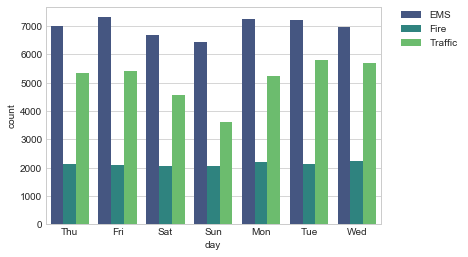

In [0]:
sns.countplot(df['day'],hue=df['Reason'],palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Let's do the same for Month:**

In [0]:
monthmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [0]:
#there may be a point of mistake here if we are not careful because our timeframe is Dec 2015 - Aug 2016
monthmap

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [0]:
df['month'] = df['month'].map(monthmap)

In [0]:
type(df['month'].iloc[0])

str

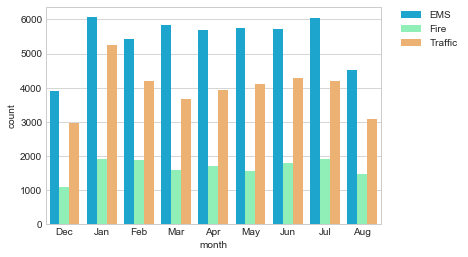

In [0]:
sns.countplot(df['month'],hue=df['Reason'],palette='rainbow')

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

In [0]:
#January was the month with the highest number of 911 calls followed by July. December had nearly half January's complaints.
df['month'].value_counts()

Jan    13205
Jul    12137
Jun    11786
Feb    11467
May    11423
Apr    11326
Mar    11101
Aug     9078
Dec     7969
Name: month, dtype: int64

** How does a simple plot off of the dataframe indicate the count of calls per month? **

In [0]:
bymonth = df.groupby('month').count()

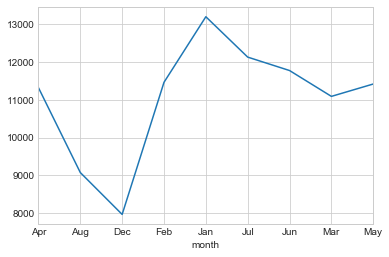

In [0]:
#this plot provides a misrepresentation because it mixes up the months. We can conclude the we should not analyse this data by month alone
bymonth['twp'].plot()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
hour         99492 non-null int64
month        99492 non-null object
day          99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 9.9+ MB


In [0]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [0]:
df['Date'].iloc[0]

datetime.date(2015, 12, 10)

** What would a plot of the 911 calls look like assessed per day?**

____


** Let us groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [0]:
byDate = df.groupby('Date').count()

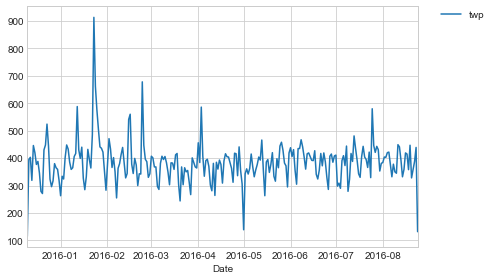

In [0]:
byDate['twp'].plot()

plt.legend(bbox_to_anchor = (1.05,1),loc=2, borderaxespad=0.)
plt.tight_layout()

** What if we split the graph above to 3 plots that represent a Reason for the 911 calls?**

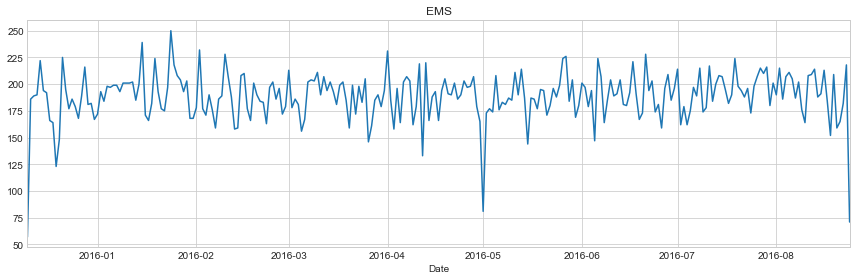

In [0]:
plt.figure(figsize=(12,4))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

plt.title('EMS')
plt.tight_layout()

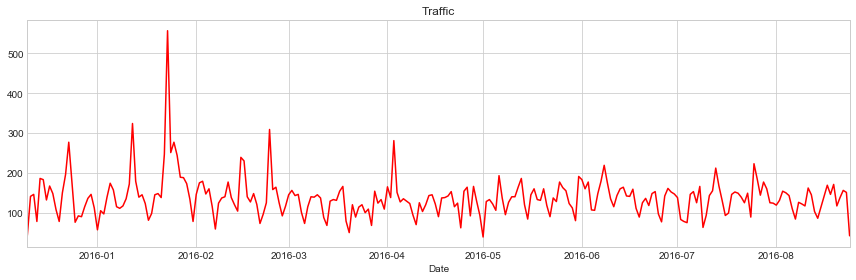

In [0]:
plt.figure(figsize=(12,4))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(c='r')

plt.title('Traffic')
plt.tight_layout()

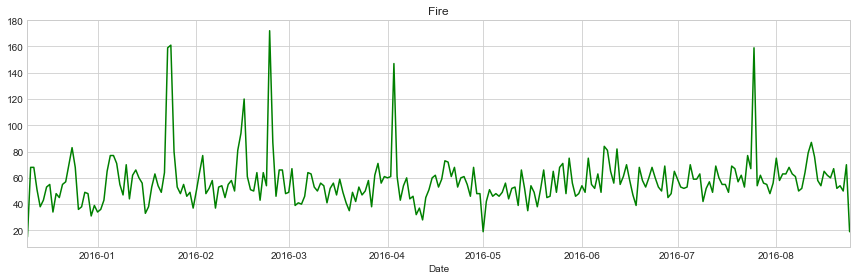

In [0]:
plt.figure(figsize=(12,4))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(c='green')

plt.title('Fire')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. We will combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [0]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'hour', 'month', 'day', 'Date'],
      dtype='object')

In [0]:
dayHour = df.groupby(by=['day','hour']).count()['Reason'].unstack()

In [0]:
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** We can now create a HeatMap using this new DataFrame. **

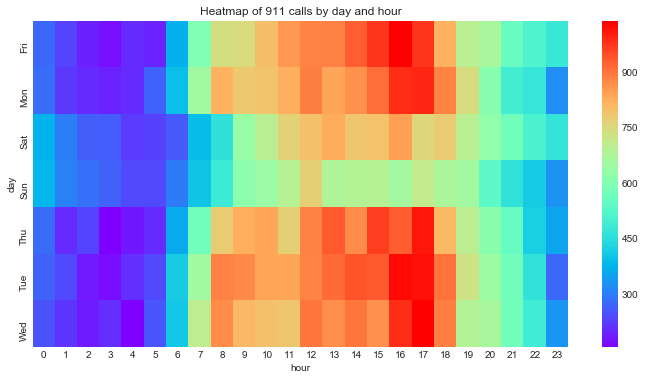

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour,cmap='rainbow')

plt.title('Heatmap of 911 calls by day and hour')

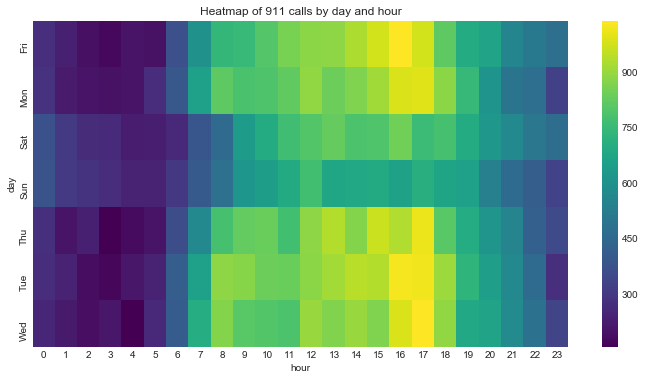

In [0]:
#same heat map with a different colormap. Viridis colormap here paints a better visualisation than rainbow

plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour,cmap='viridis')

plt.title('Heatmap of 911 calls by day and hour')

** Let's undersatnd the different clusters using a clustermap with the same DataFrame. **

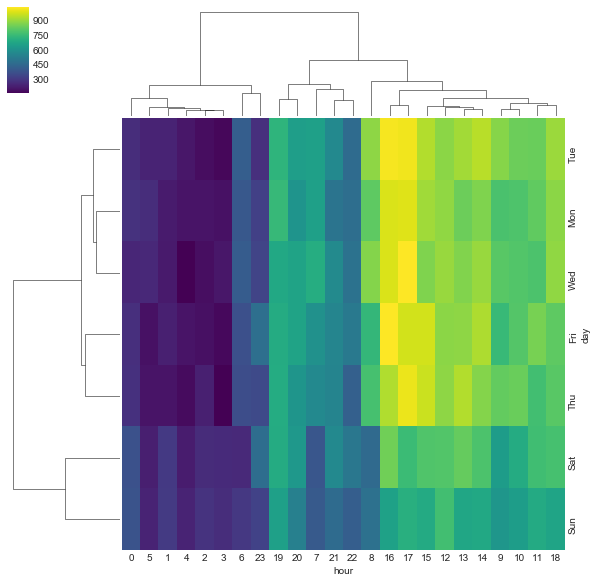

In [0]:
sns.clustermap(data=dayHour,cmap='viridis')

** Let's create a similar Heatmap, for a DataFrame that shows the Month as the column. **

In [0]:
monthDay = df.groupby(by=['day','month']).count()['twp'].unstack()

In [0]:
monthDay

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


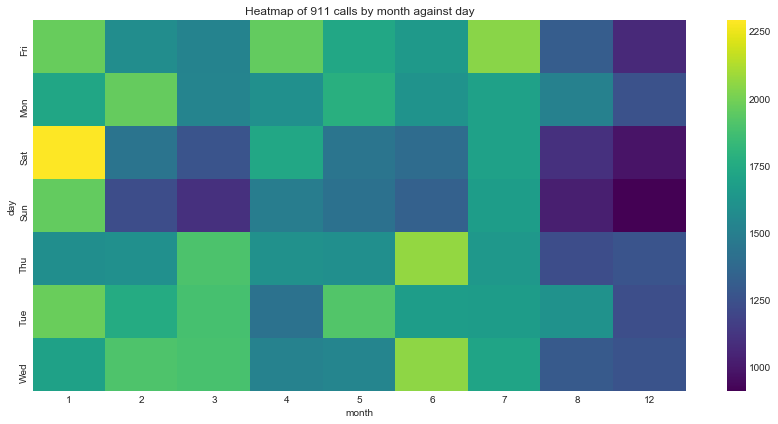

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(data=monthDay,cmap='viridis')

plt.title('Heatmap of 911 calls by month against day')
plt.tight_layout()

** And a similar clustermap **

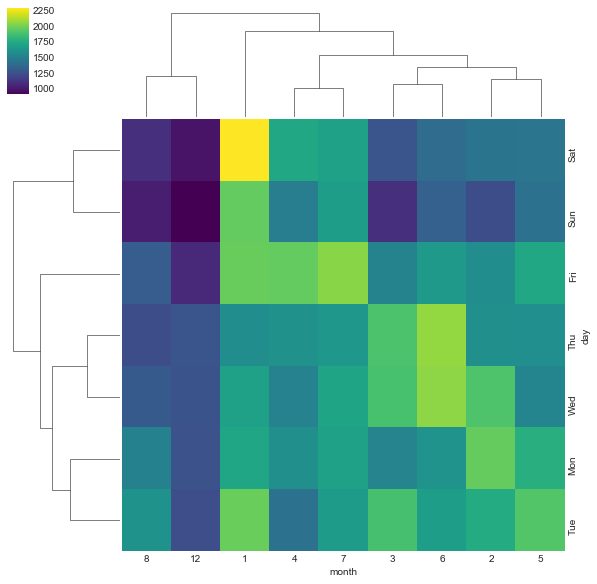

In [0]:
sns.clustermap(data=monthDay,cmap='viridis')